# 2.6 概率

# 2.6.1 基本概率论

In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [5]:
fair_probs = torch.ones(6) / 6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [6]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [7]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 0., 1., 2., 1., 4.])

In [8]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1680, 0.1710, 0.1460, 0.1660, 0.1750, 0.1740])

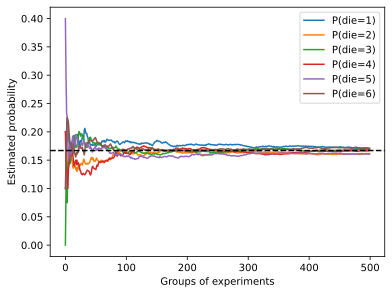

In [9]:
# 抽样500组，每组抽10个
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
# cumsum逐行累加计数，不改变size
cum_counts = counts.cumsum(dim=0)
# 保持每一行和为1,观察占比变化是否逐渐趋向1/6
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();


2.6.1.1 概率论公理

2.6.1.2 随机变量

# 2.6.2 处理多个随机变量

2.6.2.1 

2.6.2.2 

2.6.2.3 

2.6.2.4 

2.6.2.5 

2.6.2.6 

# 2.6.3 期望和方差

# 2.6.4 小结

# 2.6.5 练习

1.改变抽样和抽取个数，观察结果
同等n条件下，m增大收敛更快更稳定，m较小收敛慢，较为分散
同等m条件下，n增大初始误差变小（n=100，位于0.1-0.2），n减小初始误差更大（n=5,高时可以达到0.6）

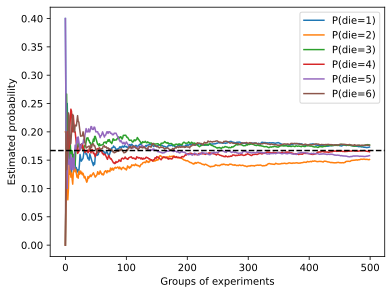

In [21]:
# 1.改变抽样和抽取个数，观察结果

# 抽样m=500？组，每组抽n=10？个
counts = multinomial.Multinomial(5, fair_probs).sample((500,))
# cumsum逐行累加计数，不改变size
cum_counts = counts.cumsum(dim=0)
# 保持每一行和为1,观察占比变化是否逐渐趋向1/6
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();